## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Skip Connection

In [ ]:
# solution 5: skip-connection

initializer = tf.keras.initializers.RandomNormal()

# Bước 1: Thực hiện 1 skip connection path tử output của hidden layer 1 đến output của hidden layer 3
# Bước 2: Thực hiện 1 skip connection path tử output của hidden layer 4 đến output của hidden layer 7
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(inputs)
prev = x
x2 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x3 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x2)
prev3 = x3
x4 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x3)
prev4 = x4
x5 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x4)
x6 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x5)
x7 = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x6)
x_skip1 = tf.math.add(prev, x3)
x_skip2 = tf.math.add(prev4, x7)
x = tf.math.add(x_skip1, x_skip2)
x = keras.layers.Dense(10)(x)
########################################################

model = keras.Model(inputs, x)

# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 3s - loss: 1.5533 - accuracy: 0.5620 - val_loss: 1.1937 - val_accuracy: 0.6546 - 3s/epoch - 29ms/step
Epoch 2/300
118/118 - 1s - loss: 1.0331 - accuracy: 0.7079 - val_loss: 0.9480 - val_accuracy: 0.7206 - 519ms/epoch - 4ms/step
Epoch 3/300
118/118 - 1s - loss: 0.8641 - accuracy: 0.7451 - val_loss: 0.8502 - val_accuracy: 0.7278 - 541ms/epoch - 5ms/step
Epoch 4/300
118/118 - 1s - loss: 0.7714 - accuracy: 0.7625 - val_loss: 0.7716 - val_accuracy: 0.7541 - 503ms/epoch - 4ms/step
Epoch 5/300
118/118 - 1s - loss: 0.7141 - accuracy: 0.7792 - val_loss: 0.7194 - val_accuracy: 0.7683 - 539ms/epoch - 5ms/step
Epoch 6/300
118/118 - 1s - loss: 0.6710 - accuracy: 0.7891 - val_loss: 0.6918 - val_accuracy: 0.7759 - 514ms/epoch - 4ms/step
Epoch 7/300
118/118 - 1s - loss: 0.6380 - accuracy: 0.7962 - val_loss: 0.6565 - val_accuracy: 0.7822 - 551ms/epoch - 5ms/step
Epoch 8/300
118/118 - 1s - loss: 0.6127 - accuracy: 0.8025 - val_loss: 0.6418 - val_accuracy: 0.7895 - 521ms/epoch - 4ms

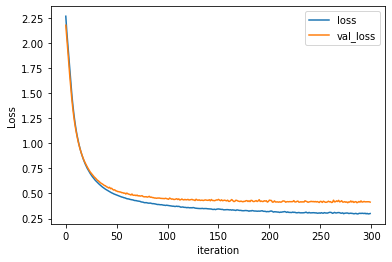

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

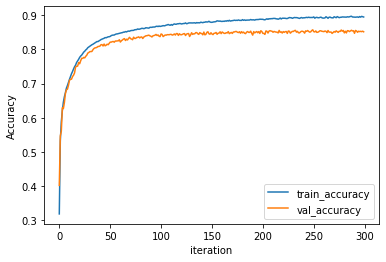

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()